# Overview

As a part of our ongoing commitment to data-driven insights, we were entrusted with the task of automating the analysis of financial stock data for a curated list of companies. Our client, an esteemed investment firm, provided us with an Excel file containing essential information about these companies, including their symbols, last sale prices, market caps, countries, and sectors.

# Objective

The primary objective was to streamline the process of collecting financial data, specifically balance sheets and income statements, from a financial data website. Furthermore, we aimed to clean, transform, visualize and store this data systematically for comprehensive analysis.

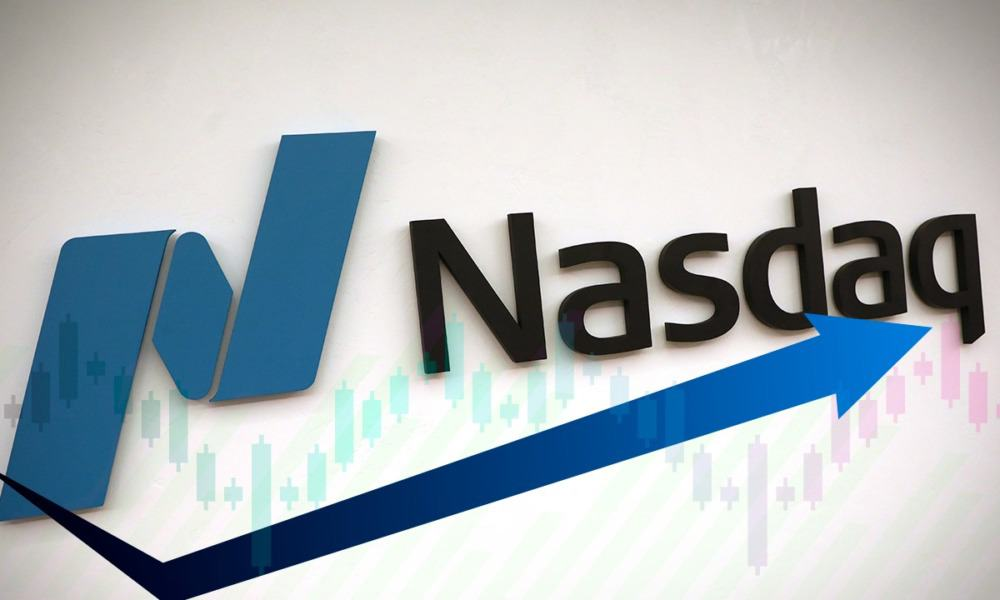

# Introduction

This report serves as a comprehensive record of the journey we embarked upon—an exploration into the realms of financial stock data analysis. Within these pages, we provide a detailed account of our methodologies, the challenges we encountered, the solutions we devised, and the invaluable insights we gained along the way.

# Data Preprocessing

In the initial phase of our data analysis journey, we focused on the provided CSV file, `nasdaq_screener.csv`, which contains crucial information about various companies.

In [33]:
import pandas as pd
nasdaq = pd.read_csv("F:/BI Projects/Dolphin Analytics Task/nasdaq_screener.csv")
nasdaq.head()

,Symbol,Last Sale,Market Cap,Country,Sector,Industry
0,A,$118.73,3.473889e+10,United States,Industrials,Electrical Products
1,AA,$30.29,5.405239e+09,United States,Industrials,Aluminum
2,AAC,$10.70,7.554656e+08,NaN,Industrials,Metal Fabrications
3,AACG,$1.23,3.889527e+07,China,Consumer Discretionary,Educational Services
4,AACI,$10.74,0.000000e+00,United States,Finance,Blank Checks


This dataset is composed of the following columns:

`Symbol`: This unique identifier represents each company in our dataset.

`Last Sale`: This provides the most recent recorded sale price for each company's stock.

`Market Cap`: Market capitalization, a company's overall value in the stock market.

`Country`: Identifies the location or origin of each company.

`Sector`: Companies are categorized into specific sectors based on their primary industry or business focus.

`Industry`: Specifies the particular sector within which each company operates.

In [34]:
nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7382 entries, 0 to 7381
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      7381 non-null   object 
 1   Last Sale   7382 non-null   object 
 2   Market Cap  6951 non-null   float64
 3   Country     6981 non-null   object 
 4   Sector      6748 non-null   object 
 5   Industry    6748 non-null   object 
dtypes: float64(1), object(5)
memory usage: 346.2+ KB


Our journey into the realm of financial analysis began with the exploration of the dataset, which contained vital information about 7,381 unique companies, each represented by a distinct `Symbol`. These companies spanned various countries, sectors, and industries.

One of the primary objectives of our data collection phase was to identify and focus on the most influential companies within each sector. Our client specifically tasked us with extracting financial data for the top 3 companies in terms of market capitalization from every sector. 

In [37]:
def get_top_3_symbol(data):
    return data.sort_values('Market Cap', ascending=False).head(3)

symbols_to_scrape = nasdaq.groupby('Sector', group_keys=False).apply(get_top_3_symbol)
symbols_to_scrape.reset_index(drop=True, inplace=True)
symbols_to_scrape

,Symbol,Last Sale,Market Cap,Country,Sector,Industry
0,BHP,$58.50,2.962680e+11,Australia,Basic Materials,Metal Mining
1,RIO,$63.40,1.031560e+11,Australia,Basic Materials,Metal Mining
2,VALE,$13.88,6.633098e+10,Brazil,Basic Materials,Metal Mining
3,AMZN,$137.27,1.416320e+12,United States,Consumer Discretionary,Catalog/Specialty Distribution
4,TSLA,$256.49,8.140980e+11,United States,Consumer Discretionary,Auto Manufacturing
5,V,$245.34,4.567840e+11,United States,Consumer Discretionary,Business Services
6,KO,$58.82,2.543580e+11,United States,Consumer Staples,Beverages (Production/Distribution)
7,PEP,$174.16,2.397450e+11,United States,Consumer Staples,Beverages (Production/Distribution)
8,SONY,$84.54,1.066120e+11,Japan,Consumer Staples,Consumer Electronics/Appliances
9,XOM,$113.53,4.544820e+11,United States,Energy,Oil & Gas Production


We identified the top-ranking companies within each sector based on predefined criteria. This meticulous process resulted in the selection of **36 exceptional companies**, each distinguished by its outstanding market capitalization in its respective sector. We then distilled this valuable dataset and saved it separately in a CSV file, ensuring that we had access to the most influential data for our analysis

In [39]:
symbols_to_scrape.to_csv('F:/BI Projects/Dolphin Analytics Task/nasdaq_screener_filtered.csv')

# Data Scraping

In the subsequent phase of our project, we harnessed the power of web scraping using Selenium to access and retrieve critical financial data from the **NASDAQ** website. Our mission was to collect both income statements and balance sheets for each of the 36 selected companies. To illustrate the process, we have provided the link to the financials page of one such company as an example: 

https://www.nasdaq.com/market-activity/stocks/aapl/financials

This dynamic approach allowed us to acquire real-time, granular financial data directly from the source, setting the stage for the comprehensive analysis that followed.

In [38]:
#symbols used for url from the data to be extracted
urls = symbols_to_scrape['Symbol'].str.lower().tolist()
urls

['bhp',
 'rio',
 'vale',
 'amzn',
 'tsla',
 'v',
 'ko',
 'pep',
 'sony',
 'xom',
 'shel',
 'cvx',
 'hsbc',
 'jpm',
 'bac',
 'lly',
 'unh',
 'nvo',
 'tmo',
 'dhr',
 'lin',
 'ferg',
 'dlb',
 'cae',
 'pld',
 'amt',
 'eqix',
 'aapl',
 'msft',
 'goog',
 'csco',
 'cmcsa',
 'tbc',
 'ngg',
 'so',
 'duk']

In [20]:
#Scraping Income Statement Table using Selenium

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import WebDriverException

path = "C:/Users/The Great Faizan/Downloads/Compressed/chromedriver-win64/chromedriver-win64/chromedriver.exe"
options = webdriver.ChromeOptions()
options.add_argument('--disable-blink-features=AutomationControlled')
options.add_argument('--port=33060')
driver = webdriver.Chrome(path, options=options)

columns = ['Symbol','Name','Date']

driver.get(f'https://www.nasdaq.com/market-activity/stocks/{urls[0]}/financials')

headings = driver.find_elements(By.XPATH, '//div[@data-panel-name="incomeStatementTable"]/table[@class="financials__table"]/tbody[@class="financials__table-body"]/tr[@class="financials__row"]//th')
for heading in headings:
    columns.append(heading.text)
    
try:
    driver.quit()
except WebDriverException:
    pass

incomeStatementData = {column:[] for column in columns}

for url in urls:
    
    driver = webdriver.Chrome(path, options=options)
    
    driver.get(f'https://www.nasdaq.com/market-activity/stocks/{url}/financials')
    
    table_heads = driver.find_elements(By.XPATH, '//div[@data-panel-name="incomeStatementTable"]/table[@class="financials__table"]/thead[@class="financials__table-headings"]/tr[contains(@class, "financials__row")]//th')
    table_rows = driver.find_elements(By.XPATH, '//div[@data-panel-name="incomeStatementTable"]/table[@class="financials__table"]/tbody[@class="financials__table-body"]//tr')
    name = driver.find_element(By.XPATH, '//span[@class="symbol-page-header__name"]')
    
    for i in range(1,len(table_heads)):
        row = []
        
        row.append(url) 
        row.append(name.text)
        row.append(table_heads[i].text)
        
        for j in range(1,len(table_rows)+1):
            data = driver.find_element(By.XPATH, f'//div[@data-panel-name="incomeStatementTable"]/table[@class="financials__table"]/tbody[@class="financials__table-body"]/tr[{j}]/td[{i}]')
            row.append(data.text)
        print(row)
            
        for k in range(len(row)):
            incomeStatementData[columns[k]].append(row[k])
            
    try:
        driver.quit()
    except WebDriverException:
        pass

['cvx', 'Chevron Corporation Common Stock (CVX)', '12/31/2022', '$235,717,000', '$170,130,000', '$65,587,000', '', '--', '$8,639,000', '$974,000', '$16,319,000', '$39,655,000', '$1,950,000', '$50,190,000', '$516,000', '$49,674,000', '$14,066,000', '$8,585,000', '-$143,000', '$44,050,000', '$35,465,000', '$35,465,000']
['cvx', 'Chevron Corporation Common Stock (CVX)', '12/31/2021', '$155,606,000', '$112,975,000', '$42,631,000', '', '--', '$8,665,000', '$549,000', '$17,925,000', '$15,492,000', '$1,202,000', '$22,351,000', '$712,000', '$21,639,000', '$5,950,000', '$5,657,000', '-$64,000', '$21,282,000', '$15,625,000', '$15,625,000']
['cvx', 'Chevron Corporation Common Stock (CVX)', '12/31/2020', '$94,471,000', '$72,471,000', '$22,000,000', '', '--', '$7,932,000', '$1,537,000', '$19,508,000', '-$6,977,000', '$693,000', '-$6,756,000', '$697,000', '-$7,453,000', '-$1,892,000', '-$472,000', '$18,000', '-$6,015,000', '-$5,543,000', '-$5,543,000']
['cvx', 'Chevron Corporation Common Stock (CVX)

['tmo', 'Thermo Fisher Scientific Inc Common Stock (TMO)', '12/31/2021', '$39,211,000', '$19,573,000', '$19,638,000', '', '$1,406,000', '$8,007,000', '$197,000', '--', '$10,028,000', '-$651,000', '$9,377,000', '$536,000', '$8,841,000', '$1,109,000', '-$4,000', '-$3,000', '$7,725,000', '$7,725,000', '$7,725,000']
['tmo', 'Thermo Fisher Scientific Inc Common Stock (TMO)', '12/31/2020', '$32,218,000', '$16,214,000', '$16,004,000', '', '$1,181,000', '$6,930,000', '$99,000', '--', '$7,794,000', '-$11,000', '$7,783,000', '$553,000', '$7,230,000', '$850,000', '-$3,000', '-$2,000', '$6,375,000', '$6,375,000', '$6,375,000']
['tmo', 'Thermo Fisher Scientific Inc Common Stock (TMO)', '12/31/2019', '$25,542,000', '$14,214,000', '$11,328,000', '', '$1,003,000', '$6,144,000', '-$413,000', '--', '$4,594,000', '$154,000', '$4,748,000', '$676,000', '$4,072,000', '$374,000', '--', '-$2,000', '$3,696,000', '$3,696,000', '$3,696,000']
['dhr', 'Danaher Corporation Common Stock (DHR)', '12/31/2022', '$31,47

['amt', 'American Tower Corporation (REIT) Common Stock (AMT)', '12/31/2019', '$7,580,300', '$2,216,800', '$5,363,500', '', '--', '$896,700', '--', '$1,778,400', '$2,688,400', '$42,200', '$2,730,600', '$814,200', '$1,916,400', '-$200', '--', '-$28,800', '$1,887,800', '$1,887,800', '$1,887,800']
['eqix', 'Equinix, Inc. Common Stock REIT (EQIX)', '12/31/2022', '$7,263,105', '$3,751,501', '$3,511,604', '', '--', '$2,307,100', '--', '--', '$1,200,528', '-$18,798', '$1,185,706', '$356,337', '$829,369', '$124,792', '--', '-$232', '$704,345', '$704,345', '$704,345']
['eqix', 'Equinix, Inc. Common Stock REIT (EQIX)', '12/31/2021', '$6,635,537', '$3,472,422', '$3,163,115', '', '--', '$2,065,798', '--', '--', '$1,108,162', '-$152,283', '$945,034', '$336,082', '$608,952', '$109,224', '--', '$463', '$500,191', '$500,191', '$500,191']
['eqix', 'Equinix, Inc. Common Stock REIT (EQIX)', '12/31/2020', '$5,998,545', '$3,074,340', '$2,924,205', '', '--', '$1,865,272', '$7,306', '--', '$1,052,928', '-$12

['tbc', 'AT&T Inc. 5.625% Global Notes due 2067 (TBC)', '12/31/2019', '$181,193,000', '$84,141,000', '$97,052,000', '', '--', '$39,422,000', '$1,458,000', '$28,217,000', '$27,955,000', '-$1,071,000', '$26,890,000', '$8,422,000', '$18,468,000', '$3,493,000', '$6,000', '-$1,072,000', '$13,909,000', '$13,903,000', '$13,900,000']
['ngg', 'National Grid Transco, PLC National Grid PLC (NEW) American Depositary Shares (NGG)', '3/31/2023', '$26,781,000', '--', '$26,781,000', '', '--', '$20,476,000', '$272,000', '--', '$6,033,000', '$171,000', '$6,415,000', '$1,976,000', '$4,439,000', '$1,083,000', '$211,000', '--', '$3,356,000', '$9,641,000', '$9,641,000']
['ngg', 'National Grid Transco, PLC National Grid PLC (NEW) American Depositary Shares (NGG)', '3/31/2022', '$24,291,000', '--', '$24,291,000', '', '--', '$18,316,000', '$220,000', '--', '$5,755,000', '$66,000', '$5,942,000', '$1,411,000', '$4,531,000', '$1,656,000', '$121,000', '--', '$2,874,000', '$3,099,000', '$3,099,000']
['ngg', 'Nation

In [21]:
incomeStatementDF = pd.DataFrame(incomeStatementData)
incomeStatementDF.tail()

,Symbol,Name,Date,Total Revenue,Cost of Revenue,Gross Profit,Operating Expenses,Research and Development,"Sales, General and Admin.",Non-Recurring Items,...,Add'l income/expense items,Earnings Before Interest and Tax,Interest Expense,Earnings Before Tax,Income Tax,Minority Interest,Equity Earnings/Loss Unconsolidated Subsidiary,Net Income-Cont. Operations,Net Income,Net Income Applicable to Common Shareholders
95,so,Southern Company (The) Common Stock (SO),12/31/2019,"$21,419,000","$11,816,000","$9,603,000",,--,"$1,230,000","$168,000",...,"$2,949,000","$8,278,000","$1,736,000","$6,542,000","$1,798,000","$162,000","$10,000","$4,916,000","$4,916,000","$4,739,000"
96,duk,Duke Energy Corporation (Holding Company) Comm...,12/31/2022,"$28,768,000","$15,792,000","$12,976,000",,--,"$1,466,000","$434,000",...,"$414,000","$6,517,000","$2,439,000","$4,078,000","$300,000","$113,000","$95,000","$3,778,000","$2,550,000","$2,444,000"
97,duk,Duke Energy Corporation (Holding Company) Comm...,12/31/2021,"$24,621,000","$12,663,000","$11,958,000",,--,"$1,355,000","$353,000",...,"$648,000","$6,198,000","$2,207,000","$3,991,000","$268,000","$62,000","$329,000","$3,723,000","$3,908,000","$3,802,000"
98,duk,Duke Energy Corporation (Holding Company) Comm...,12/31/2020,"$23,366,000","$12,013,000","$11,353,000",,--,"$1,311,000","$978,000",...,"$462,000","$3,017,000","$2,097,000","$920,000","-$169,000","-$2,005,000","$295,000","$1,089,000","$1,377,000","$1,270,000"
99,duk,Duke Energy Corporation (Holding Company) Comm...,12/31/2019,"$25,079,000","$13,519,000","$11,560,000",,--,"$1,307,000","-$8,000",...,"$426,000","$6,301,000","$2,204,000","$4,097,000","$519,000","$162,000","$177,000","$3,578,000","$3,748,000","$3,707,000"


In [22]:
incomeStatementDF.to_csv('F:/BI Projects/Dolphin Analytics Task/Scraped Data/income_statement.csv')

In [25]:
#Scraping Balance Sheet Table using Selenium

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import WebDriverException

path = "C:/Users/The Great Faizan/Downloads/Compressed/chromedriver-win64/chromedriver-win64/chromedriver.exe"
options = webdriver.ChromeOptions()
options.add_argument('--disable-blink-features=AutomationControlled')
options.add_argument('--port=33060')
driver = webdriver.Chrome(path, options=options)

columns = ['Symbol','Name','Date']

driver.get(f'https://www.nasdaq.com/market-activity/stocks/{urls[0]}/financials')

balanceSheetButton = driver.find_element(By.XPATH, '//button[@data-value="balanceSheetTable"]')
driver.execute_script("arguments[0].scrollIntoView();", balanceSheetButton)
balanceSheetButton.click()

headings = driver.find_elements(By.XPATH, '//div[@data-panel-name="balanceSheetTable"]/table[@class="financials__table"]/tbody[@class="financials__table-body"]/tr[@class="financials__row"]//th')
for heading in headings:
    columns.append(heading.text)
    
try:
    driver.quit()
except WebDriverException:
    pass

balanceSheetData = {column:[] for column in columns}

for url in urls:
    
    driver = webdriver.Chrome(path, options=options)
    
    driver.get(f'https://www.nasdaq.com/market-activity/stocks/{url}/financials')
    
    balanceSheetButton = driver.find_element(By.XPATH, '//button[@data-value="balanceSheetTable"]')
    driver.execute_script("arguments[0].scrollIntoView();", balanceSheetButton)
    balanceSheetButton.click()
    
    table_heads = driver.find_elements(By.XPATH, '//div[@data-panel-name="balanceSheetTable"]/table[@class="financials__table"]/thead[@class="financials__table-headings"]/tr[contains(@class, "financials__row")]//th')
    table_rows = driver.find_elements(By.XPATH, '//div[@data-panel-name="balanceSheetTable"]/table[@class="financials__table"]/tbody[@class="financials__table-body"]//tr')
    name = driver.find_element(By.XPATH, '//span[@class="symbol-page-header__name"]')
    
    for i in range(1,len(table_heads)):
        row = []
        
        row.append(url) 
        row.append(name.text)
        row.append(table_heads[i].text)
        
        for j in range(1,len(table_rows)+1):
            data = driver.find_element(By.XPATH, f'//div[@data-panel-name="balanceSheetTable"]/table[@class="financials__table"]/tbody[@class="financials__table-body"]/tr[{j}]/td[{i}]')
            row.append(data.text)
        print(row)
            
        for k in range(len(row)):
            balanceSheetData[columns[k]].append(row[k])
            
    try:
        driver.quit()
    except WebDriverException:
        pass

['eqix', 'Equinix, Inc. Common Stock REIT (EQIX)', '12/31/2022', '', '$1,906,421', '--', '$855,380', '--', '$543,454', '$3,305,255', '', '--', '$18,077,484', '$5,654,217', '$1,897,649', '$1,376,137', '--', '$30,310,742', '', '$1,286,147', '$161,267', '$390,884', '$1,838,298', '$14,895,937', '$2,070,675', '--', '-$134', '--', '$18,804,776', '', '$93', '-$4,352,732', '-$71,966', '$17,320,017', '-$1,389,446', '$11,505,966', '$30,310,742']
['eqix', 'Equinix, Inc. Common Stock REIT (EQIX)', '12/31/2021', '', '$1,536,358', '--', '$681,809', '--', '$738,934', '$2,957,101', '', '--', '$16,728,193', '$5,372,071', '$1,935,267', '$926,066', '--', '$27,918,698', '', '$1,066,478', '$180,928', '$358,548', '$1,605,954', '$13,560,389', '$1,870,591', '--', '-$318', '--', '$17,036,616', '', '$91', '-$3,904,647', '-$112,208', '$15,984,597', '-$1,085,751', '$10,882,082', '$27,918,698']
['eqix', 'Equinix, Inc. Common Stock REIT (EQIX)', '12/31/2020', '', '$1,604,869', '$4,532', '$676,738', '--', '$323,016'

['csco', 'Cisco Systems, Inc. Common Stock (DE) (CSCO)', '7/31/2021', '', '$9,175,000', '$15,343,000', '$10,146,000', '$1,559,000', '$2,889,000', '$39,112,000', '', '$4,884,000', '$2,338,000', '$38,168,000', '$3,619,000', '$5,016,000', '$4,360,000', '$97,497,000', '', '$6,981,000', '$2,508,000', '$16,768,000', '$26,257,000', '$9,018,000', '$10,931,000', '$10,016,000', '--', '--', '$56,222,000', '', '$42,346,000', '-$654,000', '--', '--', '-$417,000', '$41,275,000', '$97,497,000']
['csco', 'Cisco Systems, Inc. Common Stock (DE) (CSCO)', '7/25/2020', '', '$11,809,000', '$17,610,000', '$10,523,000', '$1,282,000', '$2,349,000', '$43,573,000', '', '$5,714,000', '$2,453,000', '$33,806,000', '$1,576,000', '$3,741,000', '$3,990,000', '$94,853,000', '', '$6,179,000', '$3,005,000', '$16,147,000', '$25,331,000', '$11,578,000', '$10,984,000', '$9,040,000', '--', '--', '$56,933,000', '', '$41,202,000', '-$2,763,000', '--', '--', '-$519,000', '$37,920,000', '$94,853,000']
['cmcsa', 'Comcast Corporat

['so', 'Southern Company (The) Common Stock (SO)', '12/31/2019', '', '$1,975,000', '--', '$3,409,000', '$1,909,000', '$2,524,000', '$9,817,000', '', '$3,339,000', '$84,860,000', '$5,280,000', '$536,000', '$12,699,000', '$2,169,000', '$118,700,000', '', '$4,240,000', '$5,044,000', '$3,262,000', '$12,546,000', '$41,798,000', '$15,440,000', '$16,866,000', '$4,254,000', '--', '$90,904,000', '', '$5,257,000', '$10,877,000', '-$42,000', '$11,734,000', '-$321,000', '$27,505,000', '$118,700,000']
['duk', 'Duke Energy Corporation (Holding Company) Common Stock (DUK)', '12/31/2022', '', '$409,000', '--', '$4,415,000', '$3,584,000', '$4,814,000', '$13,222,000', '', '$9,092,000', '$117,382,000', '$19,303,000', '--', '$19,087,000', '--', '$178,086,000', '', '$6,102,000', '$8,106,000', '$4,665,000', '$18,873,000', '$67,061,000', '$29,486,000', '$10,813,000', '$2,531,000', '--', '$128,764,000', '', '$1,000', '$2,637,000', '--', '$44,862,000', '-$140,000', '$49,322,000', '$178,086,000']
['duk', 'Duke 

In [26]:
balanceSheetDF = pd.DataFrame(balanceSheetData)

In [31]:
balanceSheetDF

,Unnamed: 0,Symbol,Name,Date,Current Assets,Cash and Cash Equivalents,Short-Term Investments,Net Receivables,Inventory,Other Current Assets,...,Minority Interest,Total Liabilities,Stock Holders Equity,Common Stocks,Capital Surplus,Retained Earnings,Treasury Stock,Other Equity,Total Equity,Total Liabilities & Equity
0,0,bhp,BHP Group Limited American Depositary Shares (...,6/30/2023,NaN,"$12,428,000",--,"$5,102,000","$5,220,000","$601,000",...,--,"$56,800,000",NaN,"$4,737,000","$39,787,000","-$41,000",--,"$13,000","$44,496,000","$101,296,000"
1,1,bhp,BHP Group Limited American Depositary Shares (...,6/30/2022,NaN,"$17,236,000",--,"$5,689,000","$4,935,000","$804,000",...,--,"$50,209,000",NaN,"$4,638,000","$40,338,000","-$31,000",--,"$12,000","$44,957,000","$95,166,000"
2,2,bhp,BHP Group Limited American Depositary Shares (...,6/30/2021,NaN,"$15,246,000",--,"$6,338,000","$4,426,000","$683,000",...,--,"$57,663,000",NaN,"$2,168,000","$46,779,000","-$33,000",--,"$2,350,000","$51,264,000","$108,927,000"
3,3,bhp,BHP Group Limited American Depositary Shares (...,6/30/2020,NaN,"$13,426,000",--,"$3,730,000","$4,101,000","$214,000",...,--,"$57,868,000",NaN,"$2,168,000","$43,396,000","-$5,000",--,"$2,306,000","$47,865,000","$105,733,000"
4,4,rio,Rio Tinto Plc Common Stock (RIO),12/31/2022,NaN,"$6,775,000",--,"$3,825,000","$6,213,000","$2,160,000",...,--,"$46,569,000",NaN,"$3,537,000","$34,511,000",--,"$4,322,000","$7,805,000","$50,175,000","$96,744,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,35,so,Southern Company (The) Common Stock (SO),12/31/2019,NaN,"$1,975,000",--,"$3,409,000","$1,909,000","$2,524,000",...,--,"$90,904,000",NaN,"$5,257,000","$10,877,000","-$42,000","$11,734,000","-$321,000","$27,505,000","$118,700,000"
140,36,duk,Duke Energy Corporation (Holding Company) Comm...,12/31/2022,NaN,"$409,000",--,"$4,415,000","$3,584,000","$4,814,000",...,--,"$128,764,000",NaN,"$1,000","$2,637,000",--,"$44,862,000","-$140,000","$49,322,000","$178,086,000"
141,37,duk,Duke Energy Corporation (Holding Company) Comm...,12/31/2021,NaN,"$341,000",--,"$3,522,000","$3,111,000","$2,966,000",...,--,"$120,291,000",NaN,"$1,000","$3,265,000",--,"$44,371,000","-$303,000","$49,296,000","$169,587,000"
142,38,duk,Duke Energy Corporation (Holding Company) Comm...,12/31/2020,NaN,"$259,000",--,"$3,153,000","$3,167,000","$2,103,000",...,--,"$114,424,000",NaN,"$1,000","$2,471,000",--,"$43,767,000","-$237,000","$47,964,000","$162,388,000"


In [27]:
balanceSheetDF.to_csv('F:/BI Projects/Dolphin Analytics Task/Scraped Data/balance_sheet.csv')

# Data Cleaning and Transformation

In the pursuit of data excellence, the phase of data cleaning and transformation played a pivotal role in refining our dataset for comprehensive analysis. This critical step encompassed several key operations to ensure data integrity and consistency. Firstly, we standardized all symbols by capitalizing them, eliminating any potential discrepancies. Additionally, we meticulously removed extraneous symbols like '$' and commas from monetary values, converting them into a numeric format suitable for financial analysis. 

In [116]:
nasdaq_screener = pd.read_csv('F:/BI Projects/Dolphin Analytics Task/nasdaq_screener_filtered.csv')
income_statements = pd.read_csv('F:/BI Projects/Dolphin Analytics Task/Scraped Data/income_statement.csv')
balance_sheets = pd.read_csv('F:/BI Projects/Dolphin Analytics Task/Scraped Data/balance_sheet.csv')

In [55]:
nasdaq_screener

,Unnamed: 0,Symbol,Last Sale,Market Cap,Country,Sector,Industry
0,0,BHP,$58.50,296268000000,Australia,Basic Materials,Metal Mining
1,1,RIO,$63.40,103156000000,Australia,Basic Materials,Metal Mining
2,2,VALE,$13.88,66330982970,Brazil,Basic Materials,Metal Mining
3,3,AMZN,$137.27,1416320000000,United States,Consumer Discretionary,Catalog/Specialty Distribution
4,4,TSLA,$256.49,814098000000,United States,Consumer Discretionary,Auto Manufacturing
5,5,V,$245.34,456784000000,United States,Consumer Discretionary,Business Services
6,6,KO,$58.82,254358000000,United States,Consumer Staples,Beverages (Production/Distribution)
7,7,PEP,$174.16,239745000000,United States,Consumer Staples,Beverages (Production/Distribution)
8,8,SONY,$84.54,106612000000,Japan,Consumer Staples,Consumer Electronics/Appliances
9,9,XOM,$113.53,454482000000,United States,Energy,Oil & Gas Production


In [56]:
nasdaq_screener.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  36 non-null     int64 
 1   Symbol      36 non-null     object
 2   Last Sale   36 non-null     object
 3   Market Cap  36 non-null     int64 
 4   Country     36 non-null     object
 5   Sector      36 non-null     object
 6   Industry    36 non-null     object
dtypes: int64(2), object(5)
memory usage: 2.1+ KB


In [57]:
nasdaq_screener.drop('Unnamed: 0', inplace=True, axis=1)
nasdaq_screener

,Symbol,Last Sale,Market Cap,Country,Sector,Industry
0,BHP,$58.50,296268000000,Australia,Basic Materials,Metal Mining
1,RIO,$63.40,103156000000,Australia,Basic Materials,Metal Mining
2,VALE,$13.88,66330982970,Brazil,Basic Materials,Metal Mining
3,AMZN,$137.27,1416320000000,United States,Consumer Discretionary,Catalog/Specialty Distribution
4,TSLA,$256.49,814098000000,United States,Consumer Discretionary,Auto Manufacturing
5,V,$245.34,456784000000,United States,Consumer Discretionary,Business Services
6,KO,$58.82,254358000000,United States,Consumer Staples,Beverages (Production/Distribution)
7,PEP,$174.16,239745000000,United States,Consumer Staples,Beverages (Production/Distribution)
8,SONY,$84.54,106612000000,Japan,Consumer Staples,Consumer Electronics/Appliances
9,XOM,$113.53,454482000000,United States,Energy,Oil & Gas Production


In [58]:
nasdaq_screener['Last Sale'] = nasdaq_screener['Last Sale'].str.strip("$")
nasdaq_screener

,Symbol,Last Sale,Market Cap,Country,Sector,Industry
0,BHP,58.50,296268000000,Australia,Basic Materials,Metal Mining
1,RIO,63.40,103156000000,Australia,Basic Materials,Metal Mining
2,VALE,13.88,66330982970,Brazil,Basic Materials,Metal Mining
3,AMZN,137.27,1416320000000,United States,Consumer Discretionary,Catalog/Specialty Distribution
4,TSLA,256.49,814098000000,United States,Consumer Discretionary,Auto Manufacturing
5,V,245.34,456784000000,United States,Consumer Discretionary,Business Services
6,KO,58.82,254358000000,United States,Consumer Staples,Beverages (Production/Distribution)
7,PEP,174.16,239745000000,United States,Consumer Staples,Beverages (Production/Distribution)
8,SONY,84.54,106612000000,Japan,Consumer Staples,Consumer Electronics/Appliances
9,XOM,113.53,454482000000,United States,Energy,Oil & Gas Production


In [59]:
nasdaq_screener['Last Sale'] = nasdaq_screener['Last Sale'].astype(float)
nasdaq_screener

,Symbol,Last Sale,Market Cap,Country,Sector,Industry
0,BHP,58.50,296268000000,Australia,Basic Materials,Metal Mining
1,RIO,63.40,103156000000,Australia,Basic Materials,Metal Mining
2,VALE,13.88,66330982970,Brazil,Basic Materials,Metal Mining
3,AMZN,137.27,1416320000000,United States,Consumer Discretionary,Catalog/Specialty Distribution
4,TSLA,256.49,814098000000,United States,Consumer Discretionary,Auto Manufacturing
5,V,245.34,456784000000,United States,Consumer Discretionary,Business Services
6,KO,58.82,254358000000,United States,Consumer Staples,Beverages (Production/Distribution)
7,PEP,174.16,239745000000,United States,Consumer Staples,Beverages (Production/Distribution)
8,SONY,84.54,106612000000,Japan,Consumer Staples,Consumer Electronics/Appliances
9,XOM,113.53,454482000000,United States,Energy,Oil & Gas Production


In [61]:
nasdaq_screener.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      36 non-null     object 
 1   Last Sale   36 non-null     float64
 2   Market Cap  36 non-null     int64  
 3   Country     36 non-null     object 
 4   Sector      36 non-null     object 
 5   Industry    36 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.8+ KB


In [75]:
nasdaq_screener.to_csv('F:/BI Projects/Dolphin Analytics Task/Cleaned Data/nasdaq_screener_filtered_cleaned.csv')

In [77]:
income_statements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 24 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0.1                                    144 non-null    int64  
 1   Unnamed: 0                                      144 non-null    int64  
 2   Symbol                                          144 non-null    object 
 3   Name                                            144 non-null    object 
 4   Date                                            143 non-null    object 
 5   Total Revenue                                   143 non-null    object 
 6   Cost of Revenue                                 143 non-null    object 
 7   Gross Profit                                    143 non-null    object 
 8   Operating Expenses                              0 non-null      float64
 9   Research and Development                   

In [78]:
income_statements

,Unnamed: 0.1,Unnamed: 0,Symbol,Name,Date,Total Revenue,Cost of Revenue,Gross Profit,Operating Expenses,Research and Development,...,Add'l income/expense items,Earnings Before Interest and Tax,Interest Expense,Earnings Before Tax,Income Tax,Minority Interest,Equity Earnings/Loss Unconsolidated Subsidiary,Net Income-Cont. Operations,Net Income,Net Income Applicable to Common Shareholders
0,0,0,bhp,BHP Group Limited American Depositary Shares (...,6/30/2023,"$53,817,000",--,"$53,817,000",NaN,--,...,"$529,000","$22,481,000","$2,060,000","$20,421,000","$6,691,000","$594,000","-$1,403,000","$14,324,000","$12,921,000","$12,921,000"
1,1,1,bhp,BHP Group Limited American Depositary Shares (...,6/30/2022,"$65,098,000",--,"$65,098,000",NaN,--,...,"$81,000","$33,899,000","$1,050,000","$32,849,000","$10,430,000","-$19,000","-$2,155,000","$22,400,000","$30,900,000","$30,900,000"
2,2,2,bhp,BHP Group Limited American Depositary Shares (...,6/30/2021,"$56,921,000",--,"$56,921,000",NaN,--,...,"$67,000","$26,257,000","$1,290,000","$24,967,000","$10,376,000","-$915,000","-$2,147,000","$13,676,000","$11,304,000","$11,304,000"
3,3,3,bhp,BHP Group Limited American Depositary Shares (...,6/30/2020,"$38,924,000",--,"$38,924,000",NaN,--,...,"$334,000","$14,544,000","$1,192,000","$13,352,000","$4,216,000","-$508,000","-$780,000","$8,628,000","$7,956,000","$7,956,000"
4,4,4,rio,Rio Tinto Plc Common Stock (RIO),12/31/2022,"$55,554,000","$34,770,000","$20,784,000",NaN,--,...,"-$1,616,000","$18,997,000","$335,000","$18,662,000","$5,586,000","$575,000",--,"$13,651,000","$13,076,000","$13,076,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,139,95,so,Southern Company (The) Common Stock (SO),12/31/2019,"$21,419,000","$11,816,000","$9,603,000",NaN,--,...,"$2,949,000","$8,278,000","$1,736,000","$6,542,000","$1,798,000","$162,000","$10,000","$4,916,000","$4,916,000","$4,739,000"
140,140,96,duk,Duke Energy Corporation (Holding Company) Comm...,12/31/2022,"$28,768,000","$15,792,000","$12,976,000",NaN,--,...,"$414,000","$6,517,000","$2,439,000","$4,078,000","$300,000","$113,000","$95,000","$3,778,000","$2,550,000","$2,444,000"
141,141,97,duk,Duke Energy Corporation (Holding Company) Comm...,12/31/2021,"$24,621,000","$12,663,000","$11,958,000",NaN,--,...,"$648,000","$6,198,000","$2,207,000","$3,991,000","$268,000","$62,000","$329,000","$3,723,000","$3,908,000","$3,802,000"
142,142,98,duk,Duke Energy Corporation (Holding Company) Comm...,12/31/2020,"$23,366,000","$12,013,000","$11,353,000",NaN,--,...,"$462,000","$3,017,000","$2,097,000","$920,000","-$169,000","-$2,005,000","$295,000","$1,089,000","$1,377,000","$1,270,000"


In [117]:
income_statements.drop(['Unnamed: 0.1', 'Unnamed: 0', 'Operating Expenses'], inplace=True, axis=1)
income_statements

,Symbol,Name,Date,Total Revenue,Cost of Revenue,Gross Profit,Research and Development,"Sales, General and Admin.",Non-Recurring Items,Other Operating Items,...,Add'l income/expense items,Earnings Before Interest and Tax,Interest Expense,Earnings Before Tax,Income Tax,Minority Interest,Equity Earnings/Loss Unconsolidated Subsidiary,Net Income-Cont. Operations,Net Income,Net Income Applicable to Common Shareholders
0,bhp,BHP Group Limited American Depositary Shares (...,6/30/2023,"$53,817,000",--,"$53,817,000",--,"$31,865,000",--,--,...,"$529,000","$22,481,000","$2,060,000","$20,421,000","$6,691,000","$594,000","-$1,403,000","$14,324,000","$12,921,000","$12,921,000"
1,bhp,BHP Group Limited American Depositary Shares (...,6/30/2022,"$65,098,000",--,"$65,098,000",--,"$31,280,000",--,--,...,"$81,000","$33,899,000","$1,050,000","$32,849,000","$10,430,000","-$19,000","-$2,155,000","$22,400,000","$30,900,000","$30,900,000"
2,bhp,BHP Group Limited American Depositary Shares (...,6/30/2021,"$56,921,000",--,"$56,921,000",--,"$30,731,000",--,--,...,"$67,000","$26,257,000","$1,290,000","$24,967,000","$10,376,000","-$915,000","-$2,147,000","$13,676,000","$11,304,000","$11,304,000"
3,bhp,BHP Group Limited American Depositary Shares (...,6/30/2020,"$38,924,000",--,"$38,924,000",--,"$24,714,000",--,--,...,"$334,000","$14,544,000","$1,192,000","$13,352,000","$4,216,000","-$508,000","-$780,000","$8,628,000","$7,956,000","$7,956,000"
4,rio,Rio Tinto Plc Common Stock (RIO),12/31/2022,"$55,554,000","$34,770,000","$20,784,000",--,--,"$746,000",--,...,"-$1,616,000","$18,997,000","$335,000","$18,662,000","$5,586,000","$575,000",--,"$13,651,000","$13,076,000","$13,076,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,so,Southern Company (The) Common Stock (SO),12/31/2019,"$21,419,000","$11,816,000","$9,603,000",--,"$1,230,000","$168,000","$3,038,000",...,"$2,949,000","$8,278,000","$1,736,000","$6,542,000","$1,798,000","$162,000","$10,000","$4,916,000","$4,916,000","$4,739,000"
140,duk,Duke Energy Corporation (Holding Company) Comm...,12/31/2022,"$28,768,000","$15,792,000","$12,976,000",--,"$1,466,000","$434,000","$5,086,000",...,"$414,000","$6,517,000","$2,439,000","$4,078,000","$300,000","$113,000","$95,000","$3,778,000","$2,550,000","$2,444,000"
141,duk,Duke Energy Corporation (Holding Company) Comm...,12/31/2021,"$24,621,000","$12,663,000","$11,958,000",--,"$1,355,000","$353,000","$4,762,000",...,"$648,000","$6,198,000","$2,207,000","$3,991,000","$268,000","$62,000","$329,000","$3,723,000","$3,908,000","$3,802,000"
142,duk,Duke Energy Corporation (Holding Company) Comm...,12/31/2020,"$23,366,000","$12,013,000","$11,353,000",--,"$1,311,000","$978,000","$4,504,000",...,"$462,000","$3,017,000","$2,097,000","$920,000","-$169,000","-$2,005,000","$295,000","$1,089,000","$1,377,000","$1,270,000"


In [118]:
income_statements['Symbol'] = income_statements['Symbol'].str.upper()
income_statements

,Symbol,Name,Date,Total Revenue,Cost of Revenue,Gross Profit,Research and Development,"Sales, General and Admin.",Non-Recurring Items,Other Operating Items,...,Add'l income/expense items,Earnings Before Interest and Tax,Interest Expense,Earnings Before Tax,Income Tax,Minority Interest,Equity Earnings/Loss Unconsolidated Subsidiary,Net Income-Cont. Operations,Net Income,Net Income Applicable to Common Shareholders
0,BHP,BHP Group Limited American Depositary Shares (...,6/30/2023,"$53,817,000",--,"$53,817,000",--,"$31,865,000",--,--,...,"$529,000","$22,481,000","$2,060,000","$20,421,000","$6,691,000","$594,000","-$1,403,000","$14,324,000","$12,921,000","$12,921,000"
1,BHP,BHP Group Limited American Depositary Shares (...,6/30/2022,"$65,098,000",--,"$65,098,000",--,"$31,280,000",--,--,...,"$81,000","$33,899,000","$1,050,000","$32,849,000","$10,430,000","-$19,000","-$2,155,000","$22,400,000","$30,900,000","$30,900,000"
2,BHP,BHP Group Limited American Depositary Shares (...,6/30/2021,"$56,921,000",--,"$56,921,000",--,"$30,731,000",--,--,...,"$67,000","$26,257,000","$1,290,000","$24,967,000","$10,376,000","-$915,000","-$2,147,000","$13,676,000","$11,304,000","$11,304,000"
3,BHP,BHP Group Limited American Depositary Shares (...,6/30/2020,"$38,924,000",--,"$38,924,000",--,"$24,714,000",--,--,...,"$334,000","$14,544,000","$1,192,000","$13,352,000","$4,216,000","-$508,000","-$780,000","$8,628,000","$7,956,000","$7,956,000"
4,RIO,Rio Tinto Plc Common Stock (RIO),12/31/2022,"$55,554,000","$34,770,000","$20,784,000",--,--,"$746,000",--,...,"-$1,616,000","$18,997,000","$335,000","$18,662,000","$5,586,000","$575,000",--,"$13,651,000","$13,076,000","$13,076,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,SO,Southern Company (The) Common Stock (SO),12/31/2019,"$21,419,000","$11,816,000","$9,603,000",--,"$1,230,000","$168,000","$3,038,000",...,"$2,949,000","$8,278,000","$1,736,000","$6,542,000","$1,798,000","$162,000","$10,000","$4,916,000","$4,916,000","$4,739,000"
140,DUK,Duke Energy Corporation (Holding Company) Comm...,12/31/2022,"$28,768,000","$15,792,000","$12,976,000",--,"$1,466,000","$434,000","$5,086,000",...,"$414,000","$6,517,000","$2,439,000","$4,078,000","$300,000","$113,000","$95,000","$3,778,000","$2,550,000","$2,444,000"
141,DUK,Duke Energy Corporation (Holding Company) Comm...,12/31/2021,"$24,621,000","$12,663,000","$11,958,000",--,"$1,355,000","$353,000","$4,762,000",...,"$648,000","$6,198,000","$2,207,000","$3,991,000","$268,000","$62,000","$329,000","$3,723,000","$3,908,000","$3,802,000"
142,DUK,Duke Energy Corporation (Holding Company) Comm...,12/31/2020,"$23,366,000","$12,013,000","$11,353,000",--,"$1,311,000","$978,000","$4,504,000",...,"$462,000","$3,017,000","$2,097,000","$920,000","-$169,000","-$2,005,000","$295,000","$1,089,000","$1,377,000","$1,270,000"


In [119]:
income_statements.dropna(inplace=True)
income_statements.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 143
Data columns (total 21 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Symbol                                          143 non-null    object
 1   Name                                            143 non-null    object
 2   Date                                            143 non-null    object
 3   Total Revenue                                   143 non-null    object
 4   Cost of Revenue                                 143 non-null    object
 5   Gross Profit                                    143 non-null    object
 6   Research and Development                        143 non-null    object
 7   Sales, General and Admin.                       143 non-null    object
 8   Non-Recurring Items                             143 non-null    object
 9   Other Operating Items                           143 no

In [120]:
for col in income_statements.columns[3:]:
    income_statements[col] = income_statements[col].str.replace('$','')
    income_statements[col] = income_statements[col].str.replace(',','')
    income_statements[col] = income_statements[col].str.replace('--','0')
    

income_statements

C:\Users\The Great Faizan\AppData\Local\Temp\ipykernel_17660\2829716429.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  income_statements[col] = income_statements[col].str.replace('$','')


,Symbol,Name,Date,Total Revenue,Cost of Revenue,Gross Profit,Research and Development,"Sales, General and Admin.",Non-Recurring Items,Other Operating Items,...,Add'l income/expense items,Earnings Before Interest and Tax,Interest Expense,Earnings Before Tax,Income Tax,Minority Interest,Equity Earnings/Loss Unconsolidated Subsidiary,Net Income-Cont. Operations,Net Income,Net Income Applicable to Common Shareholders
0,BHP,BHP Group Limited American Depositary Shares (...,6/30/2023,53817000,0,53817000,0,31865000,0,0,...,529000,22481000,2060000,20421000,6691000,594000,-1403000,14324000,12921000,12921000
1,BHP,BHP Group Limited American Depositary Shares (...,6/30/2022,65098000,0,65098000,0,31280000,0,0,...,81000,33899000,1050000,32849000,10430000,-19000,-2155000,22400000,30900000,30900000
2,BHP,BHP Group Limited American Depositary Shares (...,6/30/2021,56921000,0,56921000,0,30731000,0,0,...,67000,26257000,1290000,24967000,10376000,-915000,-2147000,13676000,11304000,11304000
3,BHP,BHP Group Limited American Depositary Shares (...,6/30/2020,38924000,0,38924000,0,24714000,0,0,...,334000,14544000,1192000,13352000,4216000,-508000,-780000,8628000,7956000,7956000
4,RIO,Rio Tinto Plc Common Stock (RIO),12/31/2022,55554000,34770000,20784000,0,0,746000,0,...,-1616000,18997000,335000,18662000,5586000,575000,0,13651000,13076000,13076000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,SO,Southern Company (The) Common Stock (SO),12/31/2019,21419000,11816000,9603000,0,1230000,168000,3038000,...,2949000,8278000,1736000,6542000,1798000,162000,10000,4916000,4916000,4739000
140,DUK,Duke Energy Corporation (Holding Company) Comm...,12/31/2022,28768000,15792000,12976000,0,1466000,434000,5086000,...,414000,6517000,2439000,4078000,300000,113000,95000,3778000,2550000,2444000
141,DUK,Duke Energy Corporation (Holding Company) Comm...,12/31/2021,24621000,12663000,11958000,0,1355000,353000,4762000,...,648000,6198000,2207000,3991000,268000,62000,329000,3723000,3908000,3802000
142,DUK,Duke Energy Corporation (Holding Company) Comm...,12/31/2020,23366000,12013000,11353000,0,1311000,978000,4504000,...,462000,3017000,2097000,920000,-169000,-2005000,295000,1089000,1377000,1270000


In [121]:
for col in income_statements.columns[3:]:
    income_statements[col] = income_statements[col].astype(int)

income_statements.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 143
Data columns (total 21 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Symbol                                          143 non-null    object
 1   Name                                            143 non-null    object
 2   Date                                            143 non-null    object
 3   Total Revenue                                   143 non-null    int32 
 4   Cost of Revenue                                 143 non-null    int32 
 5   Gross Profit                                    143 non-null    int32 
 6   Research and Development                        143 non-null    int32 
 7   Sales, General and Admin.                       143 non-null    int32 
 8   Non-Recurring Items                             143 non-null    int32 
 9   Other Operating Items                           143 no

In [123]:
income_statements.to_csv('F:/BI Projects/Dolphin Analytics Task/Cleaned Data/income_statements_cleaned.csv')

In [124]:
balance_sheets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 39 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0.1                                         144 non-null    int64  
 1   Unnamed: 0                                           144 non-null    int64  
 2   Symbol                                               144 non-null    object 
 3   Name                                                 144 non-null    object 
 4   Date                                                 143 non-null    object 
 5   Current Assets                                       0 non-null      float64
 6   Cash and Cash Equivalents                            143 non-null    object 
 7   Short-Term Investments                               143 non-null    object 
 8   Net Receivables                                      143 non-null    o

In [128]:
balance_sheets.drop(['Unnamed: 0.1', 'Unnamed: 0', 'Current Assets', 'Long-Term Assets', 'Current Liabilities', 'Stock Holders Equity'], inplace=True, axis=1)
balance_sheets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Symbol                                               144 non-null    object
 1   Name                                                 144 non-null    object
 2   Date                                                 143 non-null    object
 3   Cash and Cash Equivalents                            143 non-null    object
 4   Short-Term Investments                               143 non-null    object
 5   Net Receivables                                      143 non-null    object
 6   Inventory                                            143 non-null    object
 7   Other Current Assets                                 143 non-null    object
 8   Total Current Assets                                 143 non-null    object
 9  

In [131]:
balance_sheets.dropna(inplace=True)
balance_sheets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 143
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Symbol                                               143 non-null    object
 1   Name                                                 143 non-null    object
 2   Date                                                 143 non-null    object
 3   Cash and Cash Equivalents                            143 non-null    object
 4   Short-Term Investments                               143 non-null    object
 5   Net Receivables                                      143 non-null    object
 6   Inventory                                            143 non-null    object
 7   Other Current Assets                                 143 non-null    object
 8   Total Current Assets                                 143 non-null    object
 9  

In [132]:
for col in balance_sheets.columns[3:]:
    balance_sheets[col] = balance_sheets[col].str.replace('$','')
    balance_sheets[col] = balance_sheets[col].str.replace(',','')
    balance_sheets[col] = balance_sheets[col].str.replace('--','0')
    

balance_sheets

C:\Users\The Great Faizan\AppData\Local\Temp\ipykernel_17660\2038478913.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  balance_sheets[col] = balance_sheets[col].str.replace('$','')


,Symbol,Name,Date,Cash and Cash Equivalents,Short-Term Investments,Net Receivables,Inventory,Other Current Assets,Total Current Assets,Long-Term Investments,...,Misc. Stocks,Minority Interest,Total Liabilities,Common Stocks,Capital Surplus,Retained Earnings,Treasury Stock,Other Equity,Total Equity,Total Liabilities & Equity
0,bhp,BHP Group Limited American Depositary Shares (...,6/30/2023,12428000,0,5102000,5220000,601000,23351000,1768000,...,4034000,0,56800000,4737000,39787000,-41000,0,13000,44496000,101296000
1,bhp,BHP Group Limited American Depositary Shares (...,6/30/2022,17236000,0,5689000,4935000,804000,28664000,1573000,...,3809000,0,50209000,4638000,40338000,-31000,0,12000,44957000,95166000
2,bhp,BHP Group Limited American Depositary Shares (...,6/30/2021,15246000,0,6338000,4426000,683000,26693000,2079000,...,4341000,0,57663000,2168000,46779000,-33000,0,2350000,51264000,108927000
3,bhp,BHP Group Limited American Depositary Shares (...,6/30/2020,13426000,0,3730000,4101000,214000,21471000,2852000,...,4310000,0,57868000,2168000,43396000,-5000,0,2306000,47865000,105733000
4,rio,Rio Tinto Plc Common Stock (RIO),12/31/2022,6775000,0,3825000,6213000,2160000,18973000,5191000,...,2099000,0,46569000,3537000,34511000,0,4322000,7805000,50175000,96744000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,so,Southern Company (The) Common Stock (SO),12/31/2019,1975000,0,3409000,1909000,2524000,9817000,3339000,...,4254000,0,90904000,5257000,10877000,-42000,11734000,-321000,27505000,118700000
140,duk,Duke Energy Corporation (Holding Company) Comm...,12/31/2022,409000,0,4415000,3584000,4814000,13222000,9092000,...,2531000,0,128764000,1000,2637000,0,44862000,-140000,49322000,178086000
141,duk,Duke Energy Corporation (Holding Company) Comm...,12/31/2021,341000,0,3522000,3111000,2966000,9940000,10858000,...,1840000,0,120291000,1000,3265000,0,44371000,-303000,49296000,169587000
142,duk,Duke Energy Corporation (Holding Company) Comm...,12/31/2020,259000,0,3153000,3167000,2103000,8682000,10075000,...,1220000,0,114424000,1000,2471000,0,43767000,-237000,47964000,162388000


In [135]:
for col in balance_sheets.columns[3:]:
    balance_sheets[col] = balance_sheets[col].astype(int)

balance_sheets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 143
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Symbol                                               143 non-null    object
 1   Name                                                 143 non-null    object
 2   Date                                                 143 non-null    object
 3   Cash and Cash Equivalents                            143 non-null    int32 
 4   Short-Term Investments                               143 non-null    int32 
 5   Net Receivables                                      143 non-null    int32 
 6   Inventory                                            143 non-null    int32 
 7   Other Current Assets                                 143 non-null    int32 
 8   Total Current Assets                                 143 non-null    int32 
 9  

C:\Users\The Great Faizan\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


In [137]:
balance_sheets.to_csv('F:/BI Projects/Dolphin Analytics Task/Cleaned Data/balance_sheets_cleaned.csv')

# Dashboard Creation in Power BI

In our journey of comprehensive financial analysis, we harnessed the power of data visualization through Power BI, constructing two dynamic dashboards that illuminate the intricacies of the stock market.

The first dashboard, titled _"Overall Stock Analysis"_, offers a panoramic view of the market landscape, providing our client with a bird's-eye perspective of stock performance.

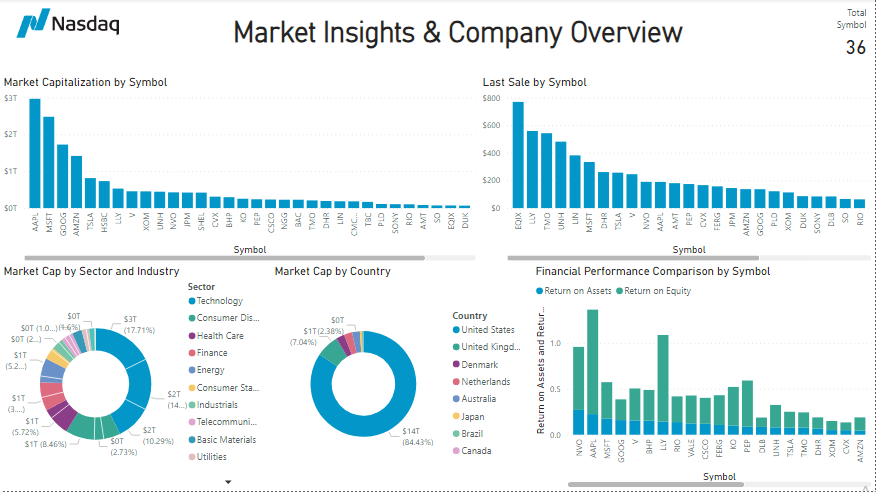


The second dashboard, named _"Company Financial Analysis"_, focuses on in-depth insights into individual company financials.

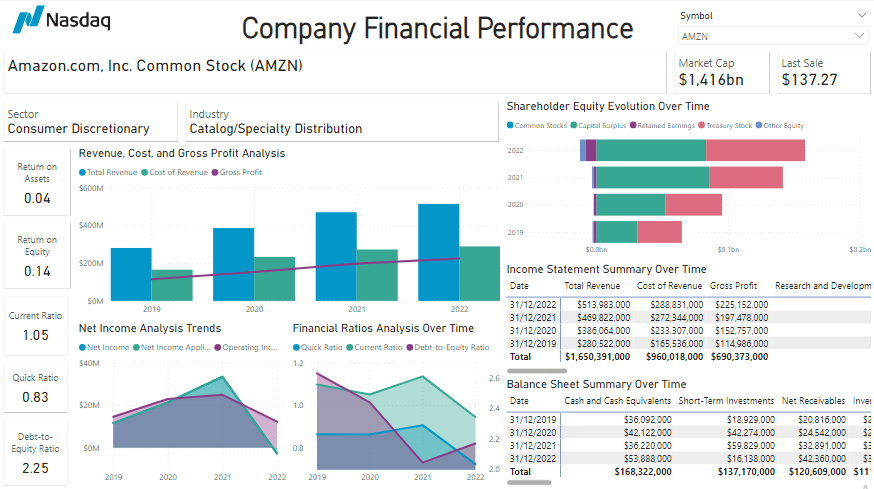

In essence, these two meticulously crafted dashboards empower our client with a robust, data-driven toolset to navigate the intricate world of stock analysis, enabling them to make informed investment decisions with clarity and confidence.

# Data Integration and Data Storage

After successfully completing the data visualization phase using Power BI, the next critical step in our journey was to establish a robust data storage solution. To ensure data durability, accessibility, and scalability, we opted for MySQL, a powerful and widely used relational database management system.

The **"nasdaq"** database is the cornerstone of our data infrastructure, designed to align seamlessly with our data needs. Within this database, we have created three core tables: **"nasdaq_screener"**, **"income_statements"** and **"balance_sheets"**. The `symbol` column in the "nasdaq_screener" table acts as the _primary key_, establishing vital connections with corresponding symbols in the "income_statements" and "balance_sheets" tables.

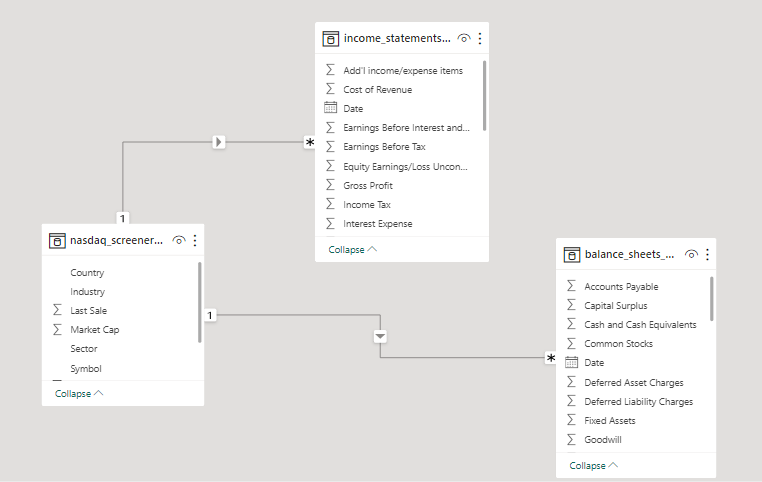

Furthermore, our dedication to transparency extends to the data import process from the previously generated CSV files.

# Recommendation and  Conclusion

This analysis has identified top-performing companies based on market capitalization, last sale price, and financial metrics. Companies like Apple (AAPL), Microsoft (MSFT), and others in the technology sector dominate the market. Additionally, Eli Lilly (LLY) and Novo Nordisk (NVO) stand out with strong financial performance. To manage risk effectively, it's advisable to diversify your portfolio across various sectors. Exploring opportunities in sectors like Health Care can be beneficial. The companies with the highest Return on Equity (ROE) also demonstrate healthy liquidity ratios and manageable debt levels, making them attractive investment options.

Throughout this report, we embarked on a comprehensive journey, from data acquisition to visualization and analysis, aimed at empowering our client, the investment firm, with data-backed insights into the financial health of a diverse range of companies. This data-driven analysis aims to provide insights into potential investment opportunities and recommends diversification as a strategy to maximize returns while minimizing risk.

> I extend my heartfelt gratitude to Dolphin Analytics for presenting me with the opportunity to undertake this assessment. I am pleased to have successfully completed this endeavor on time, and I eagerly anticipate the prospect of becoming a valued member of the Dolphin Analytics team. For further inquiries and discussions, please feel free to reach out to me via LinkedIn: https://www.linkedin.com/in/muhammad-faizan-51a892202 or email: faizanwaseem476@gmail.com. Thank you once again for this enriching experience.